# Fuzzy model 模擬函數圖形 方法一

## 匯入函式庫

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 建立membership function 的 fuzzy set

In [2]:
def trimf(x, abc):
    """
    Triangular membership function generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    abc : 1d array, length 3
        Three-element vector controlling shape of triangular function.
        Requires a <= b <= c.

    Returns
    -------
    y : 1d array
        Triangular membership function.
    """
    assert len(abc) == 3, 'abc parameter must have exactly three elements.'
    a, b, c = np.r_[abc]     # Zero-indexing in Python
    assert a <= b and b <= c, 'abc requires the three elements a <= b <= c.'

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = (x[idx] - a) / float(b - a)

    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = (c - x[idx]) / float(c - b)

    idx = np.nonzero(x == b)
    y[idx] = 1
    return y

## 建立fuzzy set的個數

In [3]:
def fuzzy_set(x, x_start, x_end, cnt, epsilon, A, e, h):
    for i in range(cnt):
        if i == 0:
            A[i, :, :] = trimf(x, [x_start, x_start, x_start + h]).reshape(-1, 1)
            e.append(x_start)
        elif i > 0 and i < cnt:
            A[i, :, :] = trimf(x, [x_start + (h * (i - 1)), x_start + (h * i), x_start + (h * (i + 1))]).reshape(-1, 1)
            e.append(x_start + (h * i))
        elif i == cnt:
            A[i, :, :] = trimf(x, [x_start + (h * (i - 2)), x_end, x_end]).reshape(-1, 1)
            e.append(x_end)


## 欲模擬的函數

In [4]:
def g_function(x1, x2):
    g = 0.5 * (x1 ** 2) + 0.2 * (x2 ** 2) + 0.7 * x2 - 0.5 * x1 * x2
    return g

## 1.定義宇集合區間與epsilon
## 2.g(x)微分取sup，並計算出h1
## 3.計算fuzzy set個數
## 4.計算fuzzy set

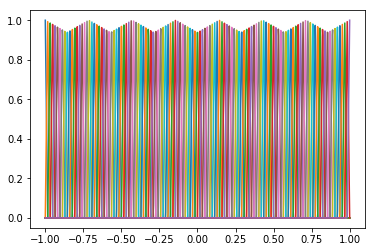

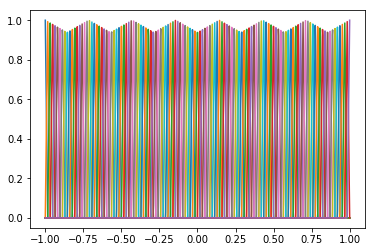

In [5]:
epsilon = 0.05 # 
x_start = -1
x_end = 1
x1 = np.linspace(x_start, x_end, 1000)
x2 = np.linspace(x_start, x_end, 1000)
x1, x2 = np.meshgrid(x1, x2)

g = g_function(x1, x2)
dg_x1 = x1 - 0.5 * x2
dg_x2 = 0.4 * x2 + 0.7 - 0.5 * x1
h1 = epsilon / np.around(np.max(dg_x1) + np.max(dg_x2), decimals = 2)

cnt = int(((x_end - x_start) / h1) + 1)

x1 = np.linspace(x_start, x_end, 1000)
x2 = np.linspace(x_start, x_end, 1000)
A1 = np.empty((cnt, int(len(x1)), 1))
A2 = np.empty((cnt, int(len(x2)), 1))
e1 = []
e2 = []

fuzzy_set(x1, x_start, x_end, cnt, epsilon, A1, e1, h1)
fuzzy_set(x2, x_start, x_end, cnt, epsilon, A2, e2, h1)
e1 = np.array(e1)
e2 = np.array(e2)

for k in range(cnt):
    plt.figure(1)
    plt.plot(x1, A1[k], label = "A1")
    plt.figure(2)
    plt.plot(x2, A2[k], label = "A2")
plt.show()

In [6]:
f = []
for i in range(len(A1)):
    for j in range(len(A2)):
        f.append(sum(g_function(e1[i], e2[j]) * A1[j] * A2[j]) / sum(A1[j] * A2[j]))

## 畫出目標函數

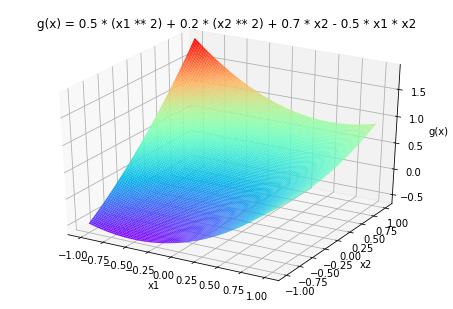

In [7]:
fig = plt.figure(2)
ax = Axes3D(fig)
x1 = np.linspace(x_start, x_end, 100)
x2 = np.linspace(x_start, x_end, 100)
x1, x2 = np.meshgrid(x1, x2)
g = 0.5 * (x1 ** 2) + 0.2 * (x2 ** 2) + 0.7 * x2 - 0.5 * x1 * x2

plt.title("g(x) = 0.5 * (x1 ** 2) + 0.2 * (x2 ** 2) + 0.7 * x2 - 0.5 * x1 * x2")
ax.plot_surface(x1, x2, g, rstride=1, cstride=1, cmap='rainbow') # 傳入x, y, z的值
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel("g(x)")
plt.show()

## 畫出模擬函數

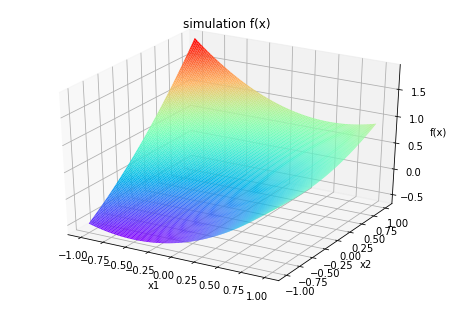

In [8]:
fig = plt.figure(3)
ax = Axes3D(fig)
e1, e2 = np.meshgrid(e1, e2)
f = np.array(f).reshape(125, 125).T
plt.title("simulation f(x)")
ax.plot_surface(e1, e2, f, rstride=1, cstride=1, cmap='rainbow') # 傳入x, y, z的值
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel("f(x)")
plt.show()